<a href="https://colab.research.google.com/github/MILLERASPRILLA/Proyecto--Churn-/blob/main/Modelos/SVM_Tesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Universidad Central](https://www.ucentral.edu.co/sites/default/files/inline-images/identificadores-Centrados_en_ti_logo-h.png)

# __PROYECTO DE GRADO__

> ## ____ Implementación de modelos de aprendizaje de máquina para la prevención de la fuga de clientes en una empresa de telecomunicaciones.
>
>
> <br>
>
> ## __Contenido__

>**Tema:**

>> Maquinas de Soporte Vectorial



>---

- Librerias

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
### Support vector Classifier
from sklearn.svm import SVC  ## Support vector classifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc 
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
from sklearn import metrics
from imblearn.under_sampling import RandomUnderSampler

# EXTRACCIÓN DE DATOS 

In [ ]:
DF_modelo = pd.read_csv("https://raw.githubusercontent.com/MILLERASPRILLA/Proyecto--Churn-/main/Bases/Data_dummie%20(1).csv")
DF_modelo.shape

(7043, 31)

In [ ]:
DF_modelo.set_index("ID_CLIENTE", inplace = True)
DF_modelo.head()

,GENERO_Male,ADULTO_MAYOR_1,CASADO_Yes,PERSONAS_A_CARGO_Yes,TIENE_TELEFONIA_Yes,VARIAS_LINEAS_No phone service,VARIAS_LINEAS_Yes,TIPO_INTERNET_Fiber optic,TIPO_INTERNET_No,SEGURIDAD_EN_LINEA_No internet service,...,SERVICIOS_STREAMING_Yes,PERIODO_CONTRATO_One year,PERIODO_CONTRATO_Two year,FACTURACION_ELECTRONICA_Yes,METODO_PAGO_Credit card (automatic),METODO_PAGO_Electronic check,METODO_PAGO_Mailed check,ABANDONO_Yes,MESES_COMO_CLIENTE,COBRO_MENSUAL
ID_CLIENTE,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,-0.608696,-0.745170
5575-GNVDE,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0.108696,-0.246550
3668-QPYBK,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,1,-0.586957,-0.303588
7795-CFOCW,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0.347826,-0.516099
9237-HQITU,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,1,-0.586957,0.006440


# EXPLORACIÓN

In [ ]:
DF_modelo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 30 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   GENERO_Male                                 7043 non-null   int64  
 1   ADULTO_MAYOR_1                              7043 non-null   int64  
 2   CASADO_Yes                                  7043 non-null   int64  
 3   PERSONAS_A_CARGO_Yes                        7043 non-null   int64  
 4   TIENE_TELEFONIA_Yes                         7043 non-null   int64  
 5   VARIAS_LINEAS_No phone service              7043 non-null   int64  
 6   VARIAS_LINEAS_Yes                           7043 non-null   int64  
 7   TIPO_INTERNET_Fiber optic                   7043 non-null   int64  
 8   TIPO_INTERNET_No                            7043 non-null   int64  
 9   SEGURIDAD_EN_LINEA_No internet service      7043 non-null   int64  
 10  SE

# MODELADO

## MODELO 1

In [ ]:
# Partición de datos de entrenamiento y prueba 
Y=DF_modelo["ABANDONO_Yes"] ## Seleccionamos la variable objetivo (binaria)
X=DF_modelo.drop("ABANDONO_Yes", axis=1) ## Seleccionamos las variables explicativas
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=123,test_size=0.3, stratify=Y) ## Dividimos en entrenamiento y prueba, y estratificando
##por la variable Y 
X_train.shape

(4930, 29)

In [ ]:
msv=SVC()  ### SVM con kernel gaussiano y parametro de penalizacion 1
msv.fit(X_train, y_train)  

SVC()

### METRICAS MODELO

In [ ]:
# Prediccion del modelo 
y_pred_train=msv.predict(X_train)
y_pred_test=msv.predict(X_test)


In [ ]:
cm = confusion_matrix(y_test, y_pred_test)

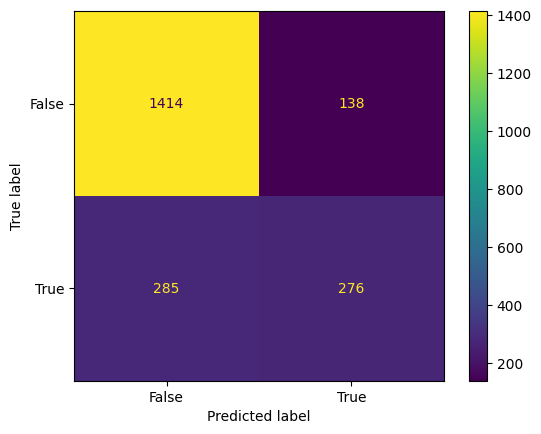

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print("En los datos de entrenamiento \n",classification_report(y_train, y_pred_train))
print("En los datos de prueba \n",classification_report(y_test, y_pred_test))

En los datos de entrenamiento 
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      3622
           1       0.70      0.53      0.60      1308

    accuracy                           0.82      4930
   macro avg       0.77      0.72      0.74      4930
weighted avg       0.81      0.82      0.81      4930

En los datos de prueba 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1552
           1       0.67      0.49      0.57       561

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



### AREA BAJO LA CURVA ROCK

In [ ]:
print("area under curve (auc): ", metrics.roc_auc_score(y_test, y_pred_test))

area under curve (auc):  0.7015305419262362


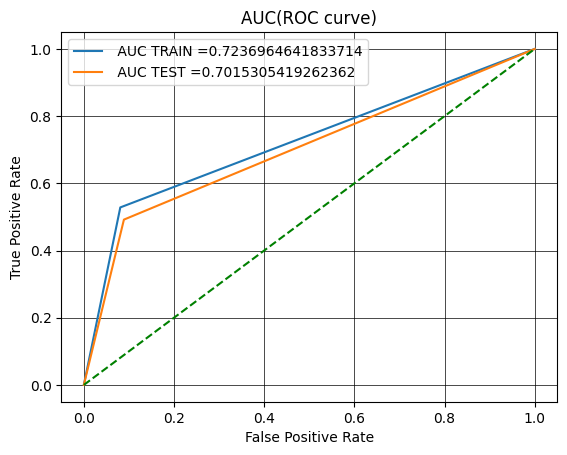

In [ ]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_pred_train)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_pred_test)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

## MODELO 2  HIPERPARAMETROS 

### AJUSTE DE HIPERPARAMETROS

In [ ]:
# Parametros de la grilla
params_grid = [{'kernel': ['rbf'],'C': [0.001,0.01,0.1,1, 100]},
               {'kernel': ['poly'],'degree': [2,3,4,5] ,'C': [0.001,0.01,0.1, 1, 10, 100]},
               {'kernel':['sigmoid'], 'C':[0.001,0.01,0.1, 1, 10, 100]}]

In [ ]:
# Crear grilla con validacion cruzada
svm_model = GridSearchCV(SVC(), params_grid, cv=5, scoring="recall")
# Evaluar modelo con la validacion cruzada
svm_model.fit(X_train, y_train)
svm_model.best_estimator_
# Mejores parametros
mejoresParametros = svm_model.best_params_
mejoresParametros

{'C': 100, 'degree': 4, 'kernel': 'poly'}

In [ ]:
svm_model = SVC(C= mejoresParametros['C'] , 
                degree = mejoresParametros['degree'], 
                kernel = mejoresParametros['kernel'])
svm_model.fit(X_train, y_train)

SVC(C=100, degree=4, kernel='poly')

In [ ]:
# Prediccion del modelo 
y_pred_train=svm_model.predict(X_train)
y_pred_test=svm_model.predict(X_test)


### METRICAS DEL MODELO

In [ ]:
cm1 = confusion_matrix(y_test, y_pred_test)

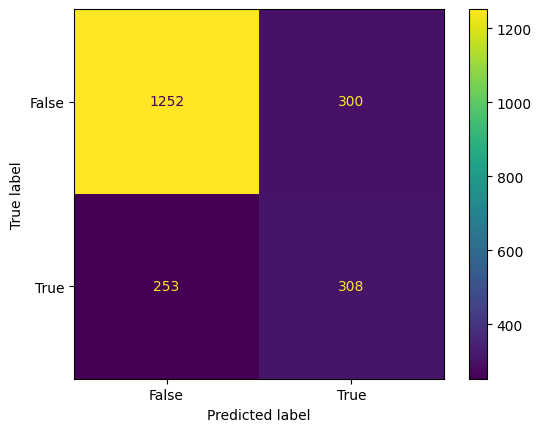

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print("En los datos de entrenamiento \n",classification_report(y_train, y_pred_train))
print("En los datos de prueba \n",classification_report(y_test, y_pred_test))

En los datos de entrenamiento 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      3622
           1       0.88      0.89      0.89      1308

    accuracy                           0.94      4930
   macro avg       0.92      0.92      0.92      4930
weighted avg       0.94      0.94      0.94      4930

En los datos de prueba 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1552
           1       0.51      0.55      0.53       561

    accuracy                           0.74      2113
   macro avg       0.67      0.68      0.67      2113
weighted avg       0.75      0.74      0.74      2113



### AREA BAJO LA CURVA ROCK 

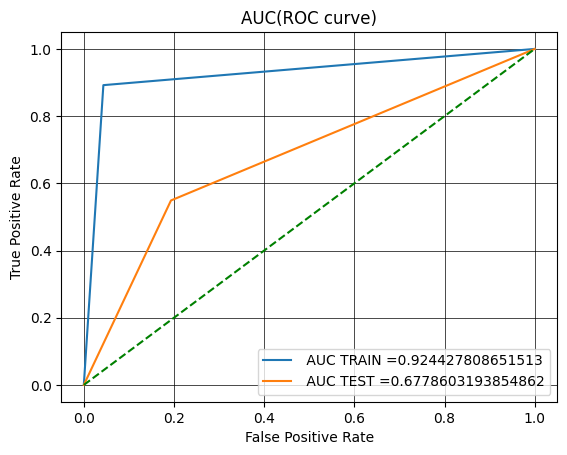

In [ ]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_pred_train)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_pred_test)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

## MODELO 3 BALANCEO

In [ ]:
# Crear grilla con validacion cruzada
svm_model = GridSearchCV(SVC(class_weight = {0 : 1, 1 : 2}), params_grid, cv=5, scoring="recall")
# Evaluar modelo con la validacion cruzada
svm_model.fit(X_train, y_train)
svm_model.best_estimator_
# Mejores parametros
mejoresParametros = svm_model.best_params_
mejoresParametros

{'C': 0.01, 'degree': 5, 'kernel': 'poly'}

In [ ]:
svm_model = SVC(class_weight = {0 : 1, 1 : 2}, 
                C= mejoresParametros['C'] , 
                degree = mejoresParametros['degree'], 
                kernel = mejoresParametros['kernel'])
svm_model.fit(X_train, y_train)

SVC(C=0.01, class_weight={0: 1, 1: 2}, degree=5, kernel='poly')

In [ ]:
# Prediccion del modelo 
y_pred_train=svm_model.predict(X_train)
y_pred_test=svm_model.predict(X_test)

### METRICAS DEL MODELO

In [ ]:
cm2 = confusion_matrix(y_test, y_pred_test)

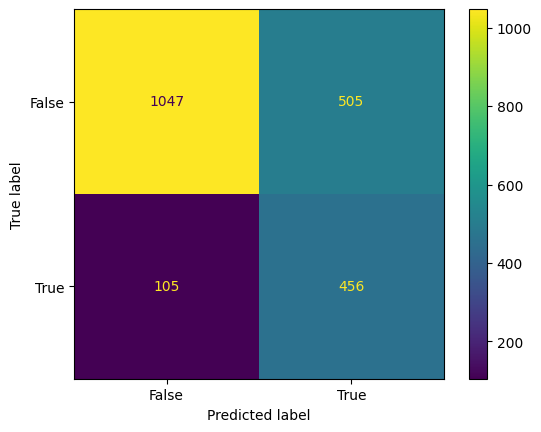

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm2, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print("En los datos de entrenamiento \n",classification_report(y_train, y_pred_train))
print("En los datos de prueba \n",classification_report(y_test, y_pred_test))

En los datos de entrenamiento 
               precision    recall  f1-score   support

           0       0.92      0.68      0.78      3622
           1       0.48      0.83      0.61      1308

    accuracy                           0.72      4930
   macro avg       0.70      0.76      0.70      4930
weighted avg       0.80      0.72      0.74      4930

En los datos de prueba 
               precision    recall  f1-score   support

           0       0.91      0.67      0.77      1552
           1       0.47      0.81      0.60       561

    accuracy                           0.71      2113
   macro avg       0.69      0.74      0.69      2113
weighted avg       0.79      0.71      0.73      2113



### AREA BAJO LA CURVA ROCK 

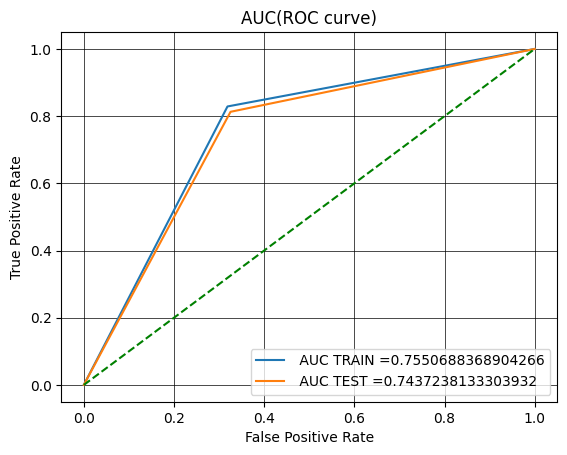

In [ ]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_pred_train)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_pred_test)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

## MODELO 4 UNDERSAMPLING 

In [ ]:
# Partición de datos de entrenamiento y prueba 
Y=DF_modelo["ABANDONO_Yes"] ## Seleccionamos la variable objetivo (binaria)
X=DF_modelo.drop("ABANDONO_Yes", axis=1) ## Seleccionamos las variables explicativas
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=123,test_size=0.3, stratify=Y) ## Dividimos en entrenamiento y prueba, y estratificando
##por la variable Y 
X_train.shape

(4930, 29)

In [ ]:
# Undersampling en los datos de entrenamiento
rus = RandomUnderSampler(random_state=42)
X_resampled, Y_resampled = rus.fit_resample(X_train, y_train)
X_resampled.shape

(2616, 29)

In [ ]:
svm_model = GridSearchCV(SVC(), params_grid, cv=5, scoring="recall")
# Evaluar modelo con la validacion cruzada
svm_model.fit(X_resampled,Y_resampled)
svm_model.best_estimator_
# Mejores parametros
mejoresParametros = svm_model.best_params_
mejoresParametros

{'C': 0.001, 'degree': 3, 'kernel': 'poly'}

In [ ]:
svm_model = SVC(C= mejoresParametros['C'] , 
                degree = mejoresParametros['degree'], 
                kernel = mejoresParametros['kernel'])
svm_model.fit(X_resampled, Y_resampled)

SVC(C=0.001, kernel='poly')

In [ ]:
# Prediccion del modelo 
y_pred_train=svm_model.predict(X_resampled)
y_pred_test=svm_model.predict(X_test)

In [ ]:
cm5 = confusion_matrix(y_test, y_pred_test)

### METRICAS DEL MODELO

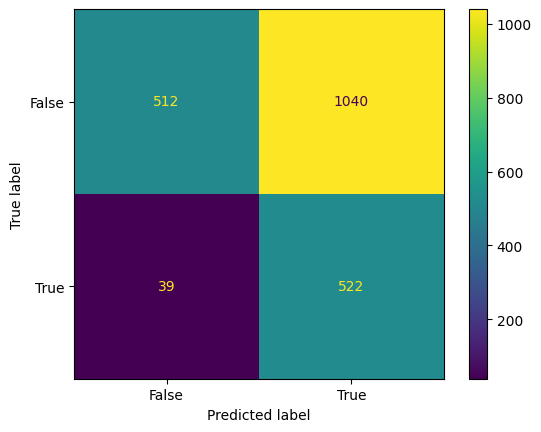

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm5, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print("En los datos de entrenamiento \n",classification_report(Y_resampled, y_pred_train))
print("En los datos de prueba \n",classification_report(y_test, y_pred_test))

En los datos de entrenamiento 
               precision    recall  f1-score   support

           0       0.84      0.31      0.45      1308
           1       0.58      0.94      0.71      1308

    accuracy                           0.62      2616
   macro avg       0.71      0.62      0.58      2616
weighted avg       0.71      0.62      0.58      2616

En los datos de prueba 
               precision    recall  f1-score   support

           0       0.93      0.33      0.49      1552
           1       0.33      0.93      0.49       561

    accuracy                           0.49      2113
   macro avg       0.63      0.63      0.49      2113
weighted avg       0.77      0.49      0.49      2113



### AREA BAJO LA CURVA ROC

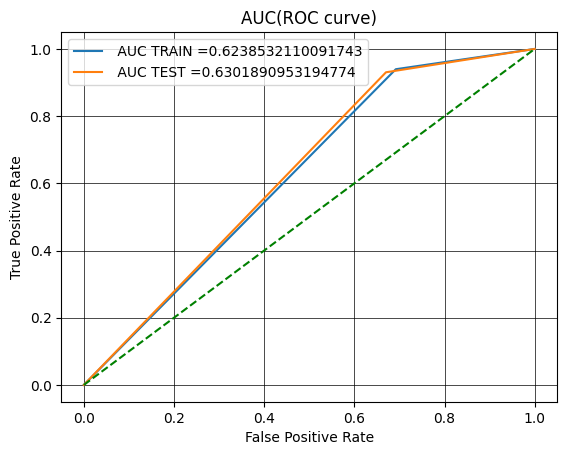

In [ ]:
train_fpr, train_tpr, tr_thresholds = roc_curve( Y_resampled, y_pred_train)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_pred_test)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

## MODELO 5 UNDERSAMPLING BALANCEO 

In [ ]:
# Partición de datos de entrenamiento y prueba 
Y=DF_modelo["ABANDONO_Yes"] ## Seleccionamos la variable objetivo (binaria)
X=DF_modelo.drop("ABANDONO_Yes", axis=1) ## Seleccionamos las variables explicativas
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=123,test_size=0.3, stratify=Y) ## Dividimos en entrenamiento y prueba, y estratificando
##por la variable Y 
X_train.shape

(4930, 29)

In [ ]:
# Undersampling en los datos de entrenamiento
rus = RandomUnderSampler(random_state=42)
X_resampled, Y_resampled = rus.fit_resample(X_train, y_train)
X_resampled.shape

(2616, 29)

In [ ]:
svm_model = GridSearchCV(SVC(class_weight = {0 : 1, 1 : 2}), params_grid, cv=5, scoring="recall")
# Evaluar modelo con la validacion cruzada
svm_model.fit(X_resampled,Y_resampled)
svm_model.best_estimator_
# Mejores parametros
mejoresParametros = svm_model.best_params_
mejoresParametros

{'C': 0.001, 'kernel': 'rbf'}

In [ ]:
svm_model = SVC(class_weight = {0 : 1, 1 : 2},
                C= 0.001 , 
                kernel = "rbf")
svm_model.fit(X_resampled, Y_resampled)

SVC(C=0.001, class_weight={0: 1, 1: 2})

In [ ]:
# Prediccion del modelo 
y_pred_train=svm_model.predict(X_resampled)
y_pred_test=svm_model.predict(X_test)

In [ ]:
cm6 = confusion_matrix(y_test, y_pred_test)

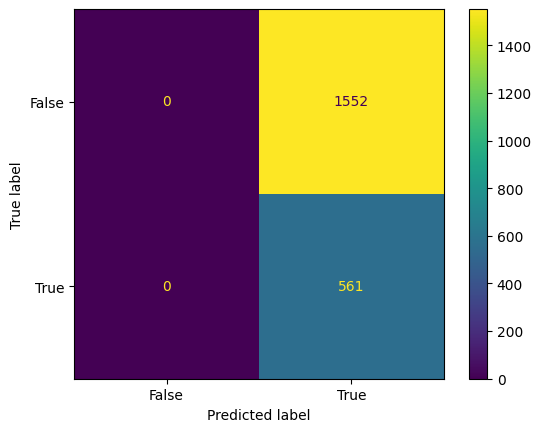

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm6, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print("En los datos de entrenamiento \n",classification_report(Y_resampled, y_pred_train))
print("En los datos de prueba \n",classification_report(y_test, y_pred_test))

En los datos de entrenamiento 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1308
           1       0.50      1.00      0.67      1308

    accuracy                           0.50      2616
   macro avg       0.25      0.50      0.33      2616
weighted avg       0.25      0.50      0.33      2616

En los datos de prueba 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1552
           1       0.27      1.00      0.42       561

    accuracy                           0.27      2113
   macro avg       0.13      0.50      0.21      2113
weighted avg       0.07      0.27      0.11      2113



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

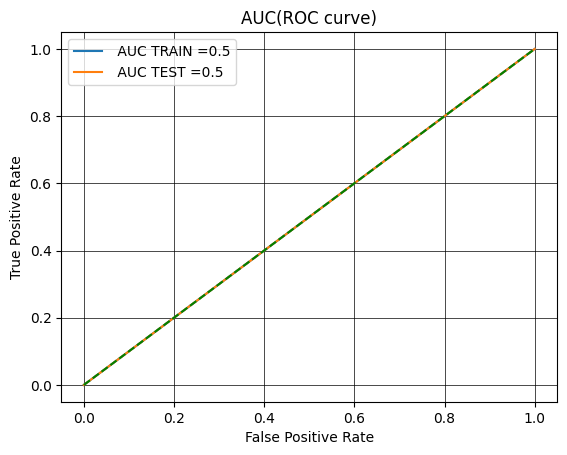

In [ ]:
train_fpr, train_tpr, tr_thresholds = roc_curve( Y_resampled, y_pred_train)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_pred_test)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()